In [1]:
import staircase as sc
from imports import *
from datetime import datetime,timedelta
from hotstepper.utilities.helpers import prepare_input,get_value,prepare_datetime,get_dt
%matplotlib inline
import operator
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"../data/page_views.csv")

#vsteps = Steps.read_dataframe(df,'start','ends')
vsteps = Steps(False).add_direct(df.start,df.ends)
queue = sc.Stairs().layer(df.start, df.ends)

df.tail()

,Unnamed: 0,start,ends
944,997,1289.924717,1297.924717
945,998,66.981087,78.981087
946,999,882.846814,896.846814
947,1000,NaN,26.846814
948,1001,217.846814,NaN


In [3]:
print(queue.integrate(),queue.mean(),queue.var(),queue.mode(),queue.median(),queue.min(),queue.max(),queue.percentile(50),queue.percentile(37))
print(vsteps.integrate(),vsteps.mean(),vsteps.var(),vsteps.mode(), vsteps.median(),vsteps.min(),vsteps.max(),vsteps.percentile(50),vsteps.percentile(37))

10589.7724423354 7.437826528630588 6.488504859740342 4 7.0 1 17 7.0 6.0
10589.772442335396 7.437826528630585 6.48850485974036 7.0 8.0 1.0 17.0 8.0 7.0


<AxesSubplot:>

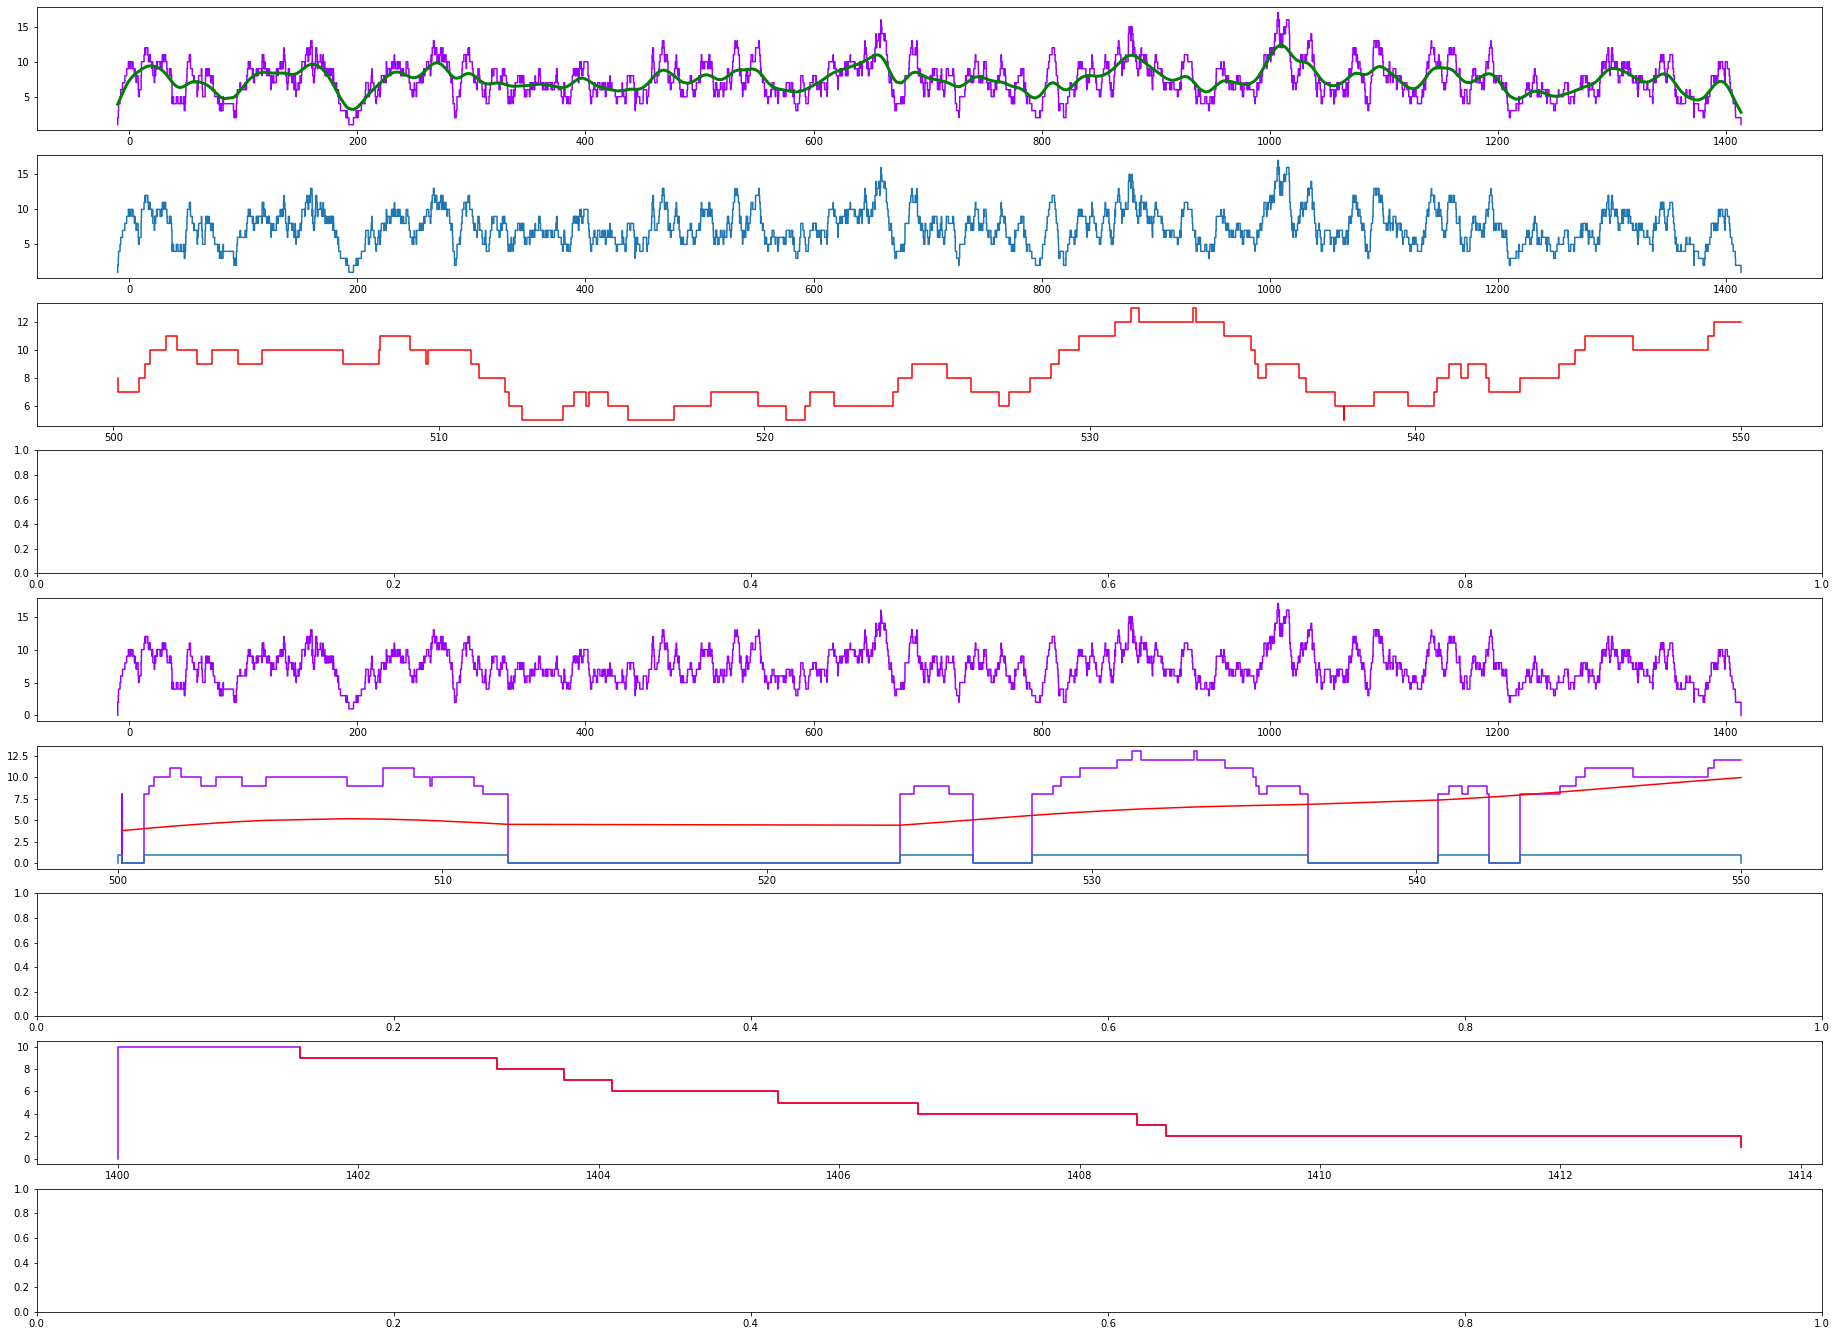

In [4]:
#p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
p = np.arange(-100, 1500, 0.1)
fig,ax = plt.subplots(nrows=9,figsize=(32,24))

st,se,span,_ = vsteps.span_and_weights()
haar = Steps().add_direct([st,se-0.5*span],[st+0.5*span,se])
vs_clip = vsteps.clip(lbound=500,ubound=550.0)

vsteps.plot(ax=ax[0])
vsteps.smooth_plot(ax=ax[0],color='g',linewidth=3)

queue = sc.Stairs().layer(df.start, df.ends)
queue.plot(ax[1])

qc = queue.clip(lower=500,upper=550)
#qc.plot(ax[2])

#(vsteps*Steps(start=500,end=550)).plot(ax=ax[2],color='g')
vs_clip.plot(ax=ax[2],color='r')

#vs_clip.plot(ax=ax[3])
(vsteps*haar).plot(ax=ax[4])

(vs_clip>7).plot(ax=ax[5])
(vs_clip>7).smooth_plot(ax=ax[5],color='r')
((qc>7)).plot(ax=ax[5])

clip_step = Steps(start=1400)
(vsteps*clip_step).plot(ax=ax[7])
vc = vsteps.clip(lbound=1400)
vc.plot(ax=ax[7],color='r')


In [ ]:
vs_mul = vsteps*Step(500,550)

print(qc.integrate(),qc.mean(),qc.var(),qc.mode(),qc.median(),qc.min(),qc.max(),qc.percentile(50),qc.percentile(37))
print(vs_clip.integrate(),vs_clip.mean(),vs_clip.var(),vs_clip.mode(), vs_clip.median(),vs_clip.min(),vs_clip.max(),vs_clip.percentile(50),vs_clip.percentile(37))
print(vs_mul.integrate(),vs_mul.mean(),vs_mul.var(),vs_mul.mode(), vs_mul.median(),vs_mul.min(),vs_mul.max(),vs_mul.percentile(50),vs_mul.percentile(37))


In [ ]:
vsteps.summary()

In [ ]:
ax = vsteps.plot(figsize=(26,6))
vsteps.plot_rolling_step(window=60,ax=ax,color='r',pre_mid_post='post',rolling_function=np.min)
vsteps.plot_rolling_step(window=60,ax=ax,color='r',pre_mid_post='post',rolling_function=np.max)
vsteps.plot_rolling_step(window=100,ax=ax,color='g',pre_mid_post='post',rolling_function=np.median,linewidth=3)


In [ ]:
clip_step = Steps(start=1400)

vc = vsteps.clip(lbound=1400)
mul = (vsteps*clip_step)

ax = mul.plot()
vc.plot(ax=ax,color='r')


In [ ]:
#%%timeit -r 3 -n 3
clip_step = Steps(start=400,end=800,weight=15)
vm = vsteps+clip_step
vm.plot()

In [ ]:
%%timeit -r 3 -n 3
(vsteps*Step(400,800))

In [ ]:
%%timeit -r 3 -n 3
vsteps.clip(lbound=400,ubound=800)

In [ ]:
h = Steps(start=900)
h2 = Steps(start=820)
h3 = Steps(end=800)
ss = Steps(start=850,end=950)

ax = h.plot()
h2.plot(ax=ax,color='g')
h3.plot(ax=ax,color='blue',linestyle=':')
ss.plot(ax=ax,color='r')


In [ ]:
print(queue.integrate(),queue.mean(),queue.var(),queue.mode())
print(vsteps.integrate(),vsteps.mean(),vsteps.var(),vsteps.mode())
